# 2.5 Computation on Arrays: Broadcasting  

We saw in the previous section how NumPy’s universal functions can be used to vec‐
torize operations and thereby remove slow Python loops. Another means of vectoriz‐
ing operations is to use NumPy’s broadcasting functionality. Broadcasting is simply a
set of rules for applying binary ufuncs (addition, subtraction, multiplication, etc.) on
arrays of different sizes.  

### Introducing Broadcasting  

In [1]:
import numpy as np

a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

The advantage of NumPy’s broadcasting is that this duplication of values does not actually take place, 

In [2]:
a + 5

array([5, 6, 7])

We can similarly extend this to arrays of higher dimension. Observe the result when we add a one-dimensional array to a two-dimensional array:

In [3]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [4]:
M +a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [5]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [6]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

![broadcasting](./images/2-9.png)

### Rules of Broadcasting  

Broadcasting in NumPy follows a strict set of rules to determine the interaction
between the two arrays:
* Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
* Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
* Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.  

__Broadcasting example 1__  

Let’s look at adding a two-dimensional array to a one-dimensional array:
```python
In[8]: M = np.ones((2, 3))
       a = np.arange(3)
```
Let’s consider an operation on these two arrays. The shapes of the arrays are:
```python
M.shape = (2, 3)
a.shape = (3,)
```
We see by rule 1 that the array a has fewer dimensions, so we pad it on the left with
ones:
``` python
M.shape -> (2, 3)
a.shape -> (1, 3)
```
By rule 2, we now see that the first dimension disagrees, so we stretch this dimension
to match:
```python
M.shape -> (2, 3)
a.shape -> (2, 3)
```
The shapes match, and we see that the final shape will be (2, 3):
```python
In[9]: M + a
Out[9]: array([[ 1., 2., 3.],
               [ 1., 2., 3.]])
```

**Broadcasting example 2**  

Let’s take a look at an example where both arrays need to be broadcast:
```python
In[10]: a = np.arange(3).reshape((3, 1))
b = np.arange(3)
```
Again, we’ll start by writing out the shape of the arrays:
```python
a.shape = (3, 1)
b.shape = (3,)
```
Rule 1 says we must pad the shape of b with ones:
```python
a.shape -> (3, 1)
b.shape -> (1, 3)
```
And rule 2 tells us that we upgrade each of these ones to match the corresponding
size of the other array:
```python
a.shape -> (3, 3)
b.shape -> (3, 3)

Because the result matches, these shapes are compatible. We can see this here:
```python
In[11]: a + b
Out[11]: array([[0, 1, 2],
                [1, 2, 3],
                [2, 3, 4]])
```

### Broadcasting in Practice

In [8]:
X = np.random.random((10,3))
X

array([[0.88732423, 0.08145773, 0.81265405],
       [0.87013779, 0.36962675, 0.77502695],
       [0.83081348, 0.93269499, 0.33166538],
       [0.24708753, 0.90991837, 0.56723699],
       [0.57635789, 0.03672342, 0.96511011],
       [0.01464792, 0.47720691, 0.17906203],
       [0.79910935, 0.16968163, 0.89252996],
       [0.5152505 , 0.24568255, 0.41354252],
       [0.60330653, 0.02423035, 0.00973866],
       [0.97484249, 0.01171222, 0.21086104]])

In [9]:
X_mean = X.mean()

In [10]:
X_mean

0.49117467645507185

In [11]:
X_centered = X - X_mean

In [12]:
X_centered

array([[ 0.39614955, -0.40971695,  0.32147937],
       [ 0.37896311, -0.12154792,  0.28385227],
       [ 0.33963881,  0.44152031, -0.1595093 ],
       [-0.24408715,  0.41874369,  0.07606231],
       [ 0.08518321, -0.45445126,  0.47393543],
       [-0.47652676, -0.01396777, -0.31211265],
       [ 0.30793468, -0.32149305,  0.40135528],
       [ 0.02407582, -0.24549213, -0.07763216],
       [ 0.11213186, -0.46694433, -0.48143601],
       [ 0.48366781, -0.47946245, -0.28031363]])

In [14]:
X_centered.mean(0)

array([ 0.14071309, -0.16528119,  0.02456809])

In [15]:
x = np.linspace(0, 5, 50)
x

array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])

In [16]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

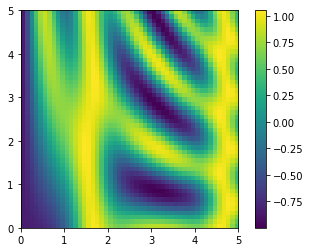

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar();

# 2.6 Comparisons, Masks, and Boolean Logic  

### Example: Counting Rainy Days

In [20]:
import numpy as np
import pandas as pd
# use Pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254 # 1/10mm -> inches
inches.shape

(365,)

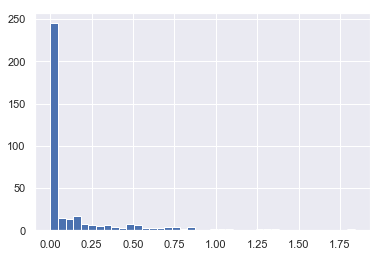

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # set plot styles

plt.hist(inches, 40);

### comparison Operators as ufuncs  

All six of the standard comparison operations are available:

In [22]:
x = np.array([1, 2, 3, 4, 5])
x < 3 # less than

array([ True,  True, False, False, False])

In [23]:
x > 3 # greater than

array([False, False, False,  True,  True])

In [24]:
x <= 3 # less than or equal

array([ True,  True,  True, False, False])

In [25]:
x >= 3 # greater than or equal

array([False, False,  True,  True,  True])

In [26]:
x != 3 # not equal

array([ True,  True, False,  True,  True])

In [27]:
 x == 3 # equal

array([False, False,  True, False, False])

It is also possible to do an element-by-element comparison of two arrays, and to include compound expressions:

In [28]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

As in the case of arithmetic operators, the comparison operators are implemented as ufuncs in NumPy; for example, when you write x < 3, internally NumPy uses np.less(x, 3). A summary of the comparison operators and their equivalent ufunc
is shown here:

![2-10](./images/2-10.png)

In [30]:
# create 2D random value matrix
a = np.random.randint(1,11,(2,3))
a

array([[ 6,  7, 10],
       [ 7,  2,  2]])

In [31]:
a.sum()

34

In [32]:
a < 5

array([[False, False, False],
       [False,  True,  True]])

### Working with Boolean Arrays  
Given a Boolean array, there are a host of useful operations you can do. We’ll work
with x, the two-dimensional array we created earlier:

In [5]:
import numpy as np
x = np.random.randint(0,11, (3,4))
x

array([[ 8,  6,  5,  7],
       [ 2,  6,  9,  1],
       [10,  8,  4, 10]])

__Counting entries__  
To count the number of True entries in a Boolean array, np.count_nonzero is useful:

In [6]:
np.count_nonzero(x<6)

4

Another way to get at this information is to use np.sum; in this case, False is interpreted as 0, and True is interpreted as 1:

In [7]:
np.sum(x < 6)

4

The benefit of sum() is that like with other NumPy aggregation functions, this summation can be done along rows or columns as well:

In [8]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([1, 2, 1])

If we’re interested in quickly checking whether any or all the values are true, we can use (you guessed it) np.any() or np.all():

In [9]:
# are there any values greater than 8?
np.any(x > 8)

True

In [10]:
# are there any values less than zero?
np.any(x < 0)

False

In [11]:
# are all values less than 10?
np.all(x < 10)

False

In [12]:
# are all values equal to 6?
np.all(x == 6)

False

np.all() and np.any() can be used along particular axes as well. For example:

### Boolean Arrays as Masks

In [13]:
x

array([[ 8,  6,  5,  7],
       [ 2,  6,  9,  1],
       [10,  8,  4, 10]])

In [14]:
x < 5

array([[False, False, False, False],
       [ True, False, False,  True],
       [False, False,  True, False]])

__Now to select these values from the array, we can simply index on this Boolean array; this is known as a masking operation:__

In [15]:
x[x < 5]

array([2, 1, 4])

### Using the Keywords and/or Versus the Operators &/|
The difference is this: and and or gauge the truth or falsehood of entire object, while & and | refer to bits within each object.

In [3]:
import numpy as np

A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

In [5]:
# error
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Similarly, when doing a Boolean expression on a given array, you should use | or & rather than or or and:

In [6]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

__Exploring Fancy Indexing__  
Fancy indexing is conceptually simple: it means passing an array of indices to access multiple array elements at once. 

In [8]:
# Documentation
np.random.RandomState?

In [11]:
np.random.RandomState.randint?

In [20]:
import numpy as np

rand = np.random.RandomState(42)
x = rand.randint(10,100, size=10)
print(x)

[61 24 81 70 30 92 96 84 84 97]


Suppose we want to access three different elements. We could do it like this:

In [21]:
[x[3], x[7], x[2]]

[70, 84, 81]

Alternatively, we can pass a single list or array of indices to obtain the same result:

In [22]:
ind = [3, 7, 4]
x[ind]

array([70, 84, 30])

With fancy indexing, the shape of the result reflects the shape of the index arrays rather than the shape of the array being indexed:

In [24]:
ind = np.array([[3, 7],
[4, 5]])
x[ind]

array([[70, 84],
       [30, 92]])

In [1]:
import numpy as np

np.newaxis?

In [6]:
rand = np.random.RandomState(42)

mean = [0, 0]
cov = [[1, 2],
        [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

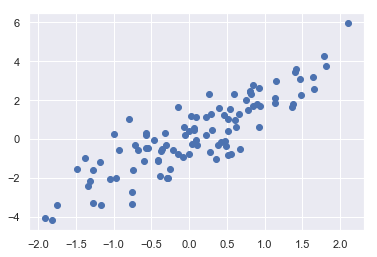

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # for plot styling
plt.scatter(X[:, 0], X[:, 1]);

Let’s use fancy indexing to select 20 random points. We’ll do this by first choosing 20
random indices with no repeats, and use these indices to select a portion of the origi‐
nal array:

In [8]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([51, 93,  3, 95, 96, 66, 63, 17, 89,  1, 61, 36, 41, 71, 39, 19, 88,
       10, 86, 13])

In [9]:
selection = X[indices] # fancy indexing here
selection.shape

(20, 2)

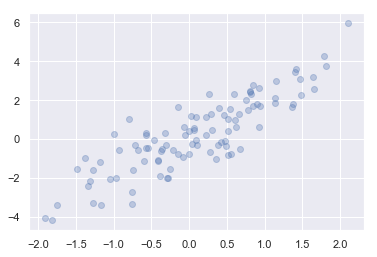

In [11]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', s=200);

### Modifying Values with Fancy Indexing

In [12]:
x = np.arange(10)
print(x)

[0 1 2 3 4 5 6 7 8 9]


In [13]:
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [14]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 1. 1. 0. 1. 0. 0. 0. 1. 0.]


In [15]:
np.add.reduceat?

# Sort

In [16]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [19]:
x.sort()
print(x)

[1 2 3 4 5]
